# 训练数据的制作
- 训练图片数据处理
- 训练图片标签

# 一、训练数据处理
- 把720\*1280\*3的图片转换成80\*160\*3的图片，并保存到pkl文件中，作为训练数据
- 注意：在OpenCV中，图像不是按传统的RGB颜色通道，而是按BGR顺序（即RGB的倒序）存储的。读取图像时默认的是BGR颜色空间的转换用函数cvtColor()实现   
- cv2.COLOR_BGR2GRAY         #BGR图像转换为灰度图像  
    cv2.COLOR_BGR2RGB       #BGR格式图像转换为RGB格式图像  
    cv2.COLOR_GRAY2BGR       #灰度图像转换成BGR图像  

### 1.批量读取图片

In [ ]:
import cv2
import numpy as np
import pickle
from scipy.misc import imresize

In [ ]:
# 读取图片
def read_image(num,file_num):
    addr = './input/xiqu_DATA/imag_'+ str(file_num) + '/' + 'imag_'+ str(file_num) + '_'+str(num) + '.jpg'
    img =  cv2.imread(addr)  
    return img

In [ ]:
# 读取图片,并保存到list中,并修改opencv读取的通道
data = []
for j in range(1,10):
    for i in range(500):
        img = read_image(i,j)
        if isinstance(img, np.ndarray):
            # 通道转换，把BGR格式图像转换为RGB格式图像
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            data.append(img)

In [ ]:
len(data)

In [ ]:
# 用一般方法显示，修改通道后的图片
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(data[5])

### 2.修改图片大小
- 对训练数据做处理，把720\*1280\*3的图片转换成80\*160\*3的图片
- 最后输出的结果保存到train_image中，是一个numpy.array类型

In [ ]:
# 把数据转换成numpy.array类型
train_image = np.array(data)

In [ ]:
# 查看图片维度
train_image.shape

In [ ]:
# 修改图片大小函数
# 返回(80, 160,3)
def re_image(image):
    result = imresize(image, (80, 160, 3))
    return result

In [ ]:
# 把720*1280*3的图片转换成80*160*3的图片
data_images = []
for i in range(train_image.shape[0]):
    img = re_image(train_image[i])
    data_images.append(img)
   

In [ ]:
len(data_images)

In [ ]:
# 把数据转换成numpy.array类型
train_image = np.array(data_images)

In [ ]:
train_image.shape

In [ ]:
# 查看修改后图片
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(train_image[5])

### 3.把数据打包成pkl文件
- 把图片训练数据打包成pkl文件。
- 是以numpy.array类型进行保存的。

In [ ]:
# 把数据写入pkl文件中
write_file=open('./output/xiqu_data_1.pkl','wb')  
pickle.dump(train_image,write_file)  
write_file.close()

### 4.把数据加载出来
- 这一步可以不做，就是查看一下数据是否保存成功

In [ ]:
# Load training images
train_image_1 = pickle.load(open("./output/xiqu_data_1.pkl", "rb" ))

In [ ]:
train_image_1.shape

In [ ]:
# # 查看保存的数据
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(train_image_1[5])

# 二、训练数据标签制作
- 说明：标签图片是以80\*160\*1的图片
- 步骤：
- 1.把图片数据加载进来大小为：720\*1280\*3
- 2.只获取G通道
- 3.修改图片大小为80\*160\*1
- 4.保存成pkl文件

## 1.批量读取图片数据

In [1]:
import cv2
import numpy as np
import pickle
from scipy.misc import imresize

In [2]:
# 读取图片
# 注意：在读取图片时要主要修改地址
# 读取图片 
def read_image(num,file_num):
    addr = './input/xiqu_DATA/imag_'+ str(file_num) + '_lab/' + 'imag_'+ str(file_num) + '_'+str(num) + '.jpg'
    img =  cv2.imread(addr)  
    return img

In [3]:
# 读取图片,并保存到list中,并修改opencv读取的通道
# 循环次数可以根据要加载的图片数量修改
data = []
for j in range(1,10):
    for i in range(500):
        img = read_image(i,j)
        if isinstance(img, np.ndarray):
            # 通道转换，把BGR格式图像转换为RGB格式图像
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            data.append(img)

In [4]:
len(data)

1488

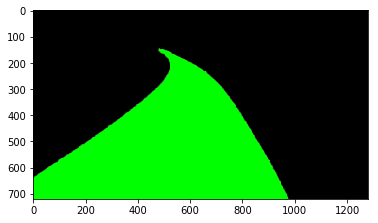

In [5]:
# 查看标签数据
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(data[5])

## 2.只获取图片的G通道
- 把表示图片list转换成ndarray类型,然后再获取G通道
- 循环获取G通道的数据，先保存到一个list中，然后再转成ndarray

In [6]:
# 把数据转换成numpy.array类型
train_lab = np.array(data)

In [7]:
train_lab.shape

(1488,)

In [8]:
# 循环获取G通道的数据,并把G通道的数据保存到一个list中
data_label = []
for i in range(train_lab.shape[0]):
    train_lab_G = train_lab[i][:,:,1]
    data_label.append(train_lab_G)

In [9]:
len(data_label)

1488

In [10]:
# 把数据转换成numpy.array类型
train_labels = np.array(data_label)

In [11]:
train_labels.shape

(1488,)

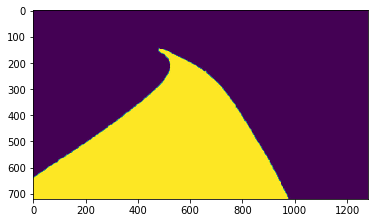

In [12]:
# 查看转换后的标签数据
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(train_labels[5])

## 3.修改图片大小
- 把720\*1280的图片转换成80\*160\*1的图片

In [13]:
# 查看图片维度
train_labels.shape

(1488,)

In [14]:
# 修改图片大小函数
# 输入720*1280的图片
# 返回(80, 160,1)
def re_image_lab(image):
    result = imresize(image, (80, 160, 1))
    return result

In [15]:
# 把720*1280的图片转换成80*160*1的图片
data_lab = []
for i in range(train_labels.shape[0]):
    img_lab = re_image_lab(train_labels[i])
    new_lab = img_lab.reshape(80,160,1)
    data_lab.append(new_lab)

In [16]:
len(data_lab)

1488

In [17]:
# 把数据转换成numpy.array类型
image_label = np.array(data_lab)

In [18]:
image_label.shape

(1488, 80, 160, 1)

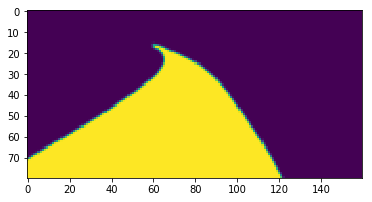

In [19]:
# 查看转换后的标签数据,80*160
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(image_label[5].reshape(80,160))

## 4.把图片标签保存成pkl文件

In [20]:
image_label.shape 

(1488, 80, 160, 1)

In [21]:
# 把数据写入pkl文件中
write_file=open('./output/xiqu_data_1_lab.pkl','wb')  
pickle.dump(image_label,write_file)  
write_file.close()


## 5.把保存的pkl文件加载出来
- 这一步可以不做，只是验证是否保存成功

In [22]:
# Load training images
train_image_1_lab = pickle.load(open("./output/xiqu_data_1_lab.pkl", "rb" ))

In [23]:
train_image_1_lab.shape

(1488, 80, 160, 1)

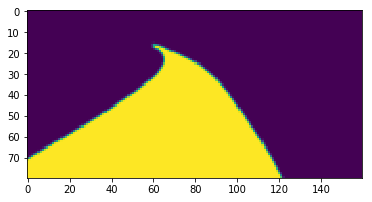

In [24]:
# # 查看保存的数据
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(train_image_1_lab[5].reshape(80,160))

In [ ]:
# 到这里完成图片训练集的制作

# 以下代码是随机测试

### 修改图片大小
- 每次dump一个

In [ ]:
# 修改图片大小函数
# 返回(720, 1280)
def re_image(image):
    result = imresize(image, (720, 1280, 1))
    return result

In [ ]:
write_file=open('./output/re_labels.pkl','wb')  
for i in range(12764):
    # 返回(720, 1280)
    new_image = re_image(lab_data[i].reshape(80,160))
    new_image = new_image.reshape(720,1280,1)
    pickle.dump(new_image,write_file)    
      
write_file.close()

## 从pkl文件中读取数据
- 注意：在pkl文件中每次load读取一个数据，类似通过open获取地址，然后通过每次load会向前移动一个地址。

In [ ]:
# 把保存的数据读取出来
read_file=open('./output/re_labels.pkl','rb')  

data = []
for i in range(5000):
    re_lab = pickle.load(read_file)
    data.append(list(re_lab))
read_file.close() 

In [ ]:
train_images = np.array(re_lab)

In [ ]:
train_images.shape

In [ ]:
# # 查看标签
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(train_images[32].reshape(720, 1280))

## 随机测试

In [ ]:
l1 = list(range(1,10))
l2 = list(range(11,20))
l3 = list(range(21,30))

In [ ]:
write_file=open('./output/test5.pkl','wb')  
pickle.dump(l1,write_file)          

In [ ]:
pickle.dump(l2,write_file)   

In [ ]:
pickle.dump(l3,write_file)   

In [ ]:
write_file.close()

In [ ]:
# 把保存的数据读取出来
read_file=open('./output/test5.pkl','rb')  

In [ ]:
test_data = []
for i in range(3):
    re_lab = pickle.load(read_file)
    test_data.append(re_lab)
read_file.close() 

In [ ]:
type(test_data)

In [ ]:
len(test_data)

In [ ]:
test_data

In [ ]:
import cv2
import numpy as np
import pickle
from scipy.misc import imresize

In [ ]:
# Load training images
data = []
for i in range(4):
    addr = './input/data/train_image_'+str(1+i)+'_label.pkl'
    train_image_1_lab = pickle.load(open(addr, "rb" ))
    np.vstack((a,b))

In [ ]:
len(data)

In [ ]:
n1 = np.array(data)

In [ ]:
n1.shape

In [ ]:
a = a

In [ ]:
addr = './input/data/train_image_'+str(1+0)+'_label.pkl'
train_image_1_lab = pickle.load(open(addr, "rb" ))

In [ ]:
addr = './input/data/train_image_'+str(1+1)+'_label.pkl'
train_image_2_lab = pickle.load(open(addr, "rb" ))

In [ ]:
print(train_image_1_lab.shape)
print(train_image_2_lab.shape)

In [ ]:
n = np.vstack((train_image_1_lab,train_image_2_lab))

In [ ]:
n.shape

In [ ]:
# # 查看保存的数据
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(n[300].reshape(80,160))

In [ ]:
addr = './input/data/train_image_'+str(1)+'_label.pkl'
train_image_lab = pickle.load(open(addr, "rb" ))
for i in list([2,3,4]):
    addr = './input/data/train_image_'+str(i)+'_label.pkl'
    test_lab = pickle.load(open(addr, "rb" ))
    train_image_lab = np.vstack((train_image_lab,test_lab))    

In [ ]:
train_image_lab.shape

In [ ]:
# # 查看保存的数据
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(train_image_lab[661].reshape(80,160))